In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

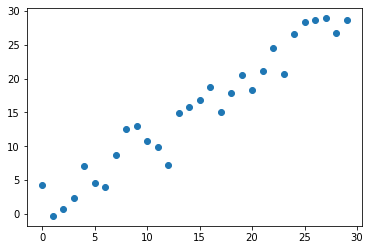

In [40]:
plt.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

Dataset initialisation :

In [66]:
dataset = pd.read_csv("dpt2018.csv", delimiter=";")

Show some elements of the dataset :

In [41]:
dataset.head(10)

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,27
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
5,1,AADIL,XXXX,XX,175
6,1,AAHIL,2016,95,3
7,1,AAHIL,XXXX,XX,17
8,1,AAKASH,XXXX,XX,26
9,1,AARON,1962,75,3


In [45]:
dataset.tail(10)

,sexe,preusuel,annais,dpt,nombre
3624984,2,ÉVIE,XXXX,XX,45
3624985,2,ÉVY,2017,42,3
3624986,2,ÉVY,2018,57,3
3624987,2,ÉVY,2018,69,4
3624988,2,ÉVY,XXXX,XX,89
3624989,2,ÉYA,2014,69,3
3624990,2,ÉYA,XXXX,XX,23
3624991,2,ÏNAYA,XXXX,XX,21
3624992,2,ÖZGE,XXXX,XX,30
3624993,2,ÖZLEM,XXXX,XX,95


In [43]:
nb_lines, nb_columns = dataset.shape
print("number lines : {}\nnumber columns : {}".format(nb_lines, nb_columns))

number lines : 3624994
number columns : 5


In [44]:
dataset.describe()

,sexe,nombre
count,3.624994e+06,3.624994e+06
mean,1.536878e+00,2.348677e+01
std,4.986382e-01,8.047885e+01
min,1.000000e+00,3.000000e+00
25%,1.000000e+00,4.000000e+00
50%,2.000000e+00,7.000000e+00
75%,2.000000e+00,1.900000e+01
max,2.000000e+00,6.328000e+03


In [47]:
dataset["sexe"].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: sexe, dtype: int64

In [48]:
dataset.dtypes

sexe         int64
preusuel    object
annais      object
dpt         object
nombre       int64
dtype: object

In [49]:
dataset.columns

Index(['sexe', 'preusuel', 'annais', 'dpt', 'nombre'], dtype='object')

In [51]:
# Group by
dataset.groupby("sexe").nombre.sum()

sexe
1    42888936
2    42250453
Name: nombre, dtype: int64

In [52]:
# Sort
dataset.sort_values(by='nombre')[-20:]

,sexe,preusuel,annais,dpt,nombre
597526,1,GERMAIN,XXXX,XX,4791
2838272,2,LYDIE,XXXX,XX,4870
691808,1,HUGUES,XXXX,XX,4878
2384919,2,FRANCE,XXXX,XX,4916
3316430,2,RACHEL,XXXX,XX,5040
552097,1,FÉLIX,XXXX,XX,5080
669783,1,HENRY,XXXX,XX,5096
1076909,1,MARTIAL,XXXX,XX,5131
2820207,2,LUCILE,XXXX,XX,5145
9823,1,ABEL,XXXX,XX,5157


In [53]:
# Top des départements avec le plus et le moins de naissances
dataset.groupby("dpt").nombre.sum().sort_values()

dpt
48      104399
04      105739
05      126071
09      156535
973     169185
        ...   
69     2073802
62     2350845
59     4175920
75     6160048
XX     8261688
Name: nombre, Length: 100, dtype: int64

In [56]:
# All time - All departements top 20
dataset.groupby(dataset.preusuel).nombre.sum().sort_values()[-20:]

preusuel
DOMINIQUE          409919
PAUL               416412
ROBERT             419297
ROGER              423873
DANIEL             435021
MARCEL             467850
CLAUDE             468445
BERNARD            469399
JACQUES            482812
ALAIN              506899
RENÉ               516739
LOUIS              517774
PHILIPPE           538661
JEANNE             556074
ANDRÉ              712568
MICHEL             820459
PIERRE             891894
_PRENOMS_RARES    1575032
JEAN              1917129
MARIE             2260236
Name: nombre, dtype: int64

In [60]:
#Filtrer les lignes :
dataset[(dataset.preusuel=="GERMAIN")].sort_values(by="nombre")[-10:]

,sexe,preusuel,annais,dpt,nombre
594601,1,GERMAIN,1912,75,35
595629,1,GERMAIN,1927,59,36
594154,1,GERMAIN,1907,12,37
594392,1,GERMAIN,1910,19,38
593963,1,GERMAIN,1904,59,42
595095,1,GERMAIN,1920,59,43
595551,1,GERMAIN,1926,59,43
595318,1,GERMAIN,1923,59,45
2432016,2,GERMAIN,XXXX,XX,120
597526,1,GERMAIN,XXXX,XX,4791


In [62]:
dataset = dataset[(dataset.dpt != "XX")]
dataset.count()

sexe        3589386
preusuel    3589386
annais      3589386
dpt         3589386
nombre      3589386
dtype: int64

In [65]:
# 10 prenoms les plus frequents de 2018
dataset[(dataset.annais=="2018")].groupby(dataset.preusuel).nombre.sum().sort_values()[-10:]

preusuel
LOUISE             3765
ADAM               3885
JADE               3977
LUCAS              3978
EMMA               4367
LOUIS              4411
LÉO                4444
RAPHAËL            4589
GABRIEL            5418
_PRENOMS_RARES    53978
Name: nombre, dtype: int64

EXERCICE :

DATASET : https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/

In [4]:
data_2019 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/3004168d-bec4-44d9-a781-ef16f41856a2", delimiter="|", decimal="," , parse_dates=True, low_memory=False)

Affichage du pourcentage des différentes natures de mutations dans toute la France en 2019

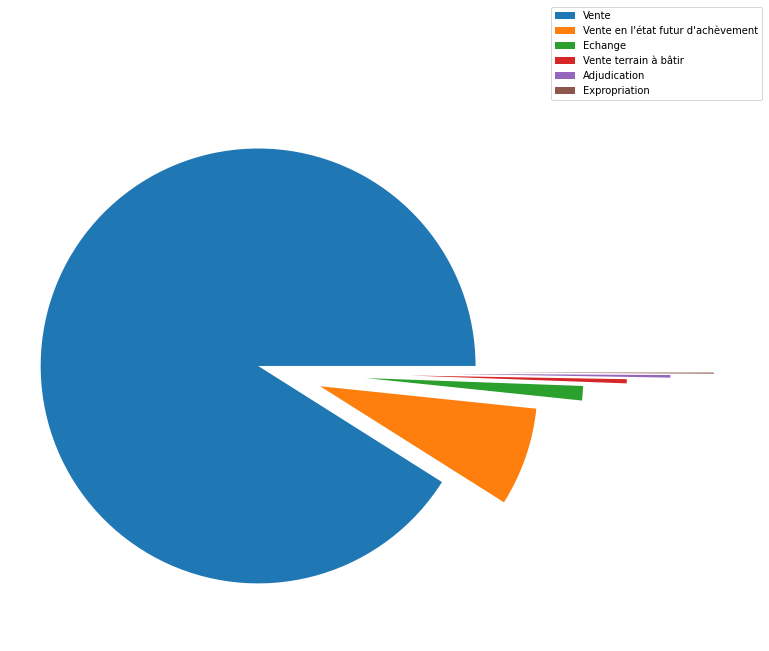

In [6]:
data_to_show = data_2019[['Nature mutation']]
data_to_show = data_to_show['Nature mutation'].value_counts(normalize=True) * 100
tab_index = [data_to_show.index[x] for x in range(len(data_to_show.index))]
plt.figure(figsize=(10, 10))
plt.pie(data_to_show, explode=(0.1, 0.2, 0.4, 0.6, 0.8, 1))
plt.legend(tab_index, loc=(1, 1))
plt.show()

Affichage de la valeur foncière cumulé par jour en 2019

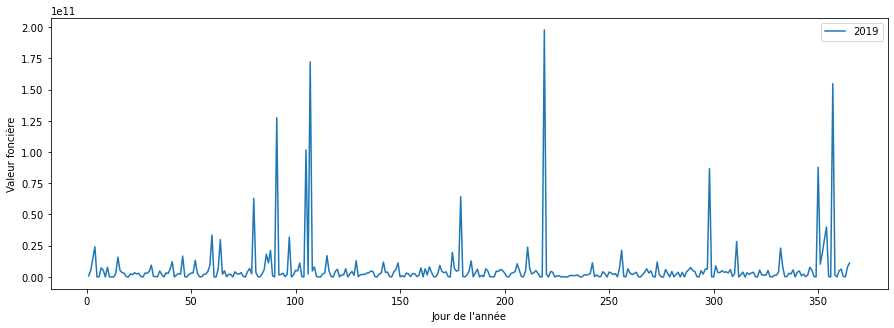

In [8]:
data_2019['Date mutation'] =  pd.to_datetime(data_2019['Date mutation'], infer_datetime_format=True)
data_2019a = data_2019.resample('D', on='Date mutation')['Valeur fonciere'].sum().to_frame()
data_2019a['Doy'] = data_2019a.index.dayofyear

fig, ax = plt.subplots(figsize=(15, 5))
                                
data_2019a.rename(columns={'Valeur fonciere': "2019"}).plot(kind='line',x='Doy', y='2019',ax=ax)

plt.xlabel("Jour de l'année")
plt.ylabel("Valeur foncière")

plt.show()

Répartition des types de locaux pour le département 75

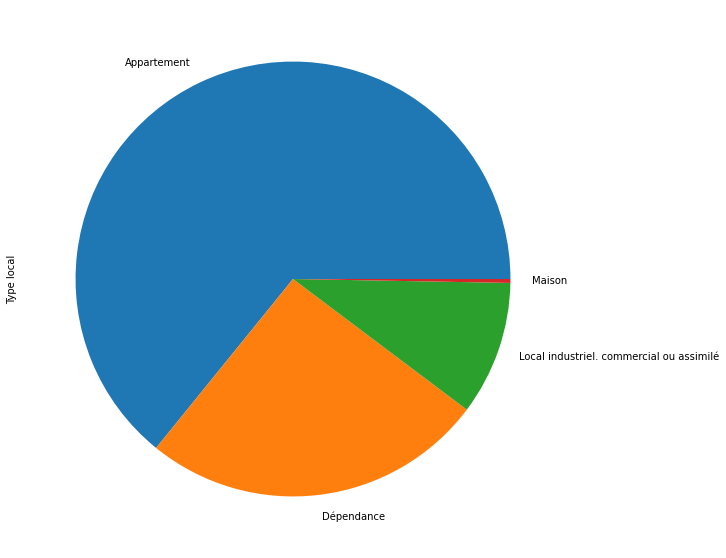

In [9]:
type_data_2019 = data_2019.loc[data_2019['Code departement'] == '75'].groupby('Type local')['Type local'].count()
type_data_2019.plot.pie(figsize=(10, 10))
plt.show()